# 1.1. Introduction to fraud detection

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

sns.set_style('whitegrid')

import sys
FILEPATH='/home/anonymous/Documents/github/data-science-toolbox/notebooks'

if FILEPATH not in sys.path:
    sys.path.append(FILEPATH)

import pandas_common

In [2]:
sys.path

['/home/anonymous/anaconda3/lib/python36.zip',
 '/home/anonymous/anaconda3/lib/python3.6',
 '/home/anonymous/anaconda3/lib/python3.6/lib-dynload',
 '',
 '/home/anonymous/.local/lib/python3.6/site-packages',
 '/home/anonymous/anaconda3/lib/python3.6/site-packages',
 '/home/anonymous/anaconda3/lib/python3.6/site-packages/IPython/extensions',
 '/home/anonymous/.ipython',
 '/home/anonymous/Documents/github/data-science-toolbox/notebooks']

In [3]:
pandas_common.config_pandas_display()
pd.set_option('display.max_colwidth', 500)

In [4]:
def printListItemLength(List):
    for item in List:
        print(len(item))

In [5]:
df = pd.read_csv('data/chapter_1/creditcard_sampledata.csv', index_col=0)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8000 entries, 0 to 7999
Data columns (total 31 columns):
Time      8000 non-null int64
V1        8000 non-null float64
V2        8000 non-null float64
V3        8000 non-null float64
V4        8000 non-null float64
V5        8000 non-null float64
V6        8000 non-null float64
V7        8000 non-null float64
V8        8000 non-null float64
V9        8000 non-null float64
V10       8000 non-null float64
V11       8000 non-null float64
V12       8000 non-null float64
V13       8000 non-null float64
V14       8000 non-null float64
V15       8000 non-null float64
V16       8000 non-null float64
V17       8000 non-null float64
V18       8000 non-null float64
V19       8000 non-null float64
V20       8000 non-null float64
V21       8000 non-null float64
V22       8000 non-null float64
V23       8000 non-null float64
V24       8000 non-null float64
V25       8000 non-null float64
V26       8000 non-null float64
V27       8000 non-null float64

In [6]:
df.shape

(8000, 31)

In [7]:
df.head(2)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,64,1.212511,-0.099054,-1.192094,0.286324,2.160516,3.616314,-0.404207,0.842331,0.169360,-0.030522,-0.541957,0.237212,-0.218130,0.197437,-0.147850,-0.097830,-0.510053,-0.070939,0.355171,0.014777,-0.167496,-0.494695,-0.149785,1.011227,0.883548,-0.329434,0.020370,0.017037,34.70,0
1,64,-0.658305,0.406791,2.037461,-0.291298,0.147910,-0.350857,0.945373,-0.172560,0.025133,-0.778135,-0.196290,0.632955,0.374025,-0.531597,-0.615063,-0.518078,0.003881,-1.288954,-0.797804,0.064133,-0.156096,-0.238805,0.089877,0.421195,-0.352487,0.074783,-0.094192,-0.092493,54.99,0


In [8]:
df1_2 = pd.read_csv('data/chapter_1/creditcard_sampledata_3.csv', index_col=0)
df1_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5050 entries, 258647 to 63421
Data columns (total 30 columns):
V1        5050 non-null float64
V2        5050 non-null float64
V3        5050 non-null float64
V4        5050 non-null float64
V5        5050 non-null float64
V6        5050 non-null float64
V7        5050 non-null float64
V8        5050 non-null float64
V9        5050 non-null float64
V10       5050 non-null float64
V11       5050 non-null float64
V12       5050 non-null float64
V13       5050 non-null float64
V14       5050 non-null float64
V15       5050 non-null float64
V16       5050 non-null float64
V17       5050 non-null float64
V18       5050 non-null float64
V19       5050 non-null float64
V20       5050 non-null float64
V21       5050 non-null float64
V22       5050 non-null float64
V23       5050 non-null float64
V24       5050 non-null float64
V25       5050 non-null float64
V26       5050 non-null float64
V27       5050 non-null float64
V28       5050 non-null

In [9]:
df1_2.shape

(5050, 30)

In [10]:
df1_2.head(2)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
258647,1.725265,-1.337256,-1.012687,-0.361656,-1.431611,-1.098681,-0.842274,-0.026594,-0.032409,0.215113,1.618952,-0.654046,-1.442665,-1.546538,-0.230008,1.785539,1.419793,0.071666,0.233031,0.275911,0.414524,0.793434,0.028887,0.419421,-0.367529,-0.155634,-0.015768,0.010790,189.00,0
69263,0.683254,-1.681875,0.533349,-0.326064,-1.455603,0.101832,-0.520590,0.114036,-0.601760,0.444011,1.521570,0.499202,-0.127849,-0.237253,-0.752351,0.667190,0.724785,-1.736615,0.702088,0.638186,0.116898,-0.304605,-0.125547,0.244848,0.069163,-0.460712,-0.017068,0.063542,315.17,0


In [11]:
df1_2.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,5050.000000,5050.000000,5050.000000,5050.000000,5050.000000,5050.000000,5050.000000,5050.000000,5050.000000,5050.000000,5050.000000,5050.000000,5050.000000,5050.000000,5050.000000,5050.000000,5050.000000,5050.000000,5050.000000,5050.000000,5050.000000,5050.000000,5050.000000,5050.000000,5050.000000,5050.000000,5050.000000,5050.000000,5050.000000,5050.000000
mean,-0.014675,0.044325,-0.035144,0.002494,-0.046625,-0.046340,-0.043020,-0.008398,-0.027331,-0.056943,0.035342,-0.052371,0.003131,-0.063824,-0.027567,-0.044949,-0.070704,-0.037026,-0.007536,-0.000940,-0.003516,-0.009421,-0.004147,-0.001200,-0.003314,-0.004836,-0.005726,0.002482,86.117232,0.009901
std,1.952784,1.558235,1.691458,1.493592,1.321320,1.254301,1.338170,1.323247,1.134506,1.278092,1.105792,1.259155,0.994961,1.190900,0.905586,1.031225,1.234009,0.894977,0.827070,0.715765,0.756735,0.724749,0.601276,0.599400,0.517363,0.481913,0.411055,0.302719,227.210259,0.099020
min,-25.266355,-18.701995,-26.823673,-4.575708,-18.664251,-6.357009,-23.783470,-41.484823,-8.504285,-17.141514,-3.469084,-18.683715,-3.539561,-15.297656,-3.875765,-14.129855,-21.338195,-8.484449,-4.038451,-13.421949,-20.262054,-5.532541,-17.026156,-2.307453,-3.308049,-1.715640,-7.976100,-5.048979,0.000000,0.000000
25%,-0.926226,-0.589562,-0.873696,-0.871759,-0.733235,-0.777552,-0.571678,-0.211263,-0.651215,-0.541561,-0.752762,-0.438689,-0.639214,-0.462520,-0.601438,-0.490668,-0.490088,-0.508041,-0.471003,-0.212240,-0.231508,-0.558904,-0.161166,-0.354973,-0.316947,-0.331584,-0.070963,-0.052133,4.990000,0.000000
50%,0.009592,0.088726,0.168377,-0.027034,-0.060932,-0.304225,0.036753,0.000985,-0.052724,-0.109888,-0.032953,0.144052,-0.019056,0.032090,0.013126,0.064560,-0.077191,-0.021247,-0.004843,-0.062039,-0.035204,-0.013332,-0.011305,0.038272,0.019200,-0.059882,0.003521,0.012842,20.260000,0.000000
75%,1.310062,0.809298,1.017166,0.763626,0.603678,0.356664,0.594029,0.313264,0.568374,0.437051,0.759681,0.623239,0.683348,0.466251,0.607702,0.516420,0.389950,0.469353,0.458362,0.124908,0.196481,0.509243,0.146835,0.441278,0.348177,0.228486,0.095662,0.077357,75.000000,0.000000
max,2.422508,14.323254,3.760965,11.885313,9.880564,7.473970,9.288494,16.633103,8.054123,12.562347,9.939820,4.846452,3.579906,6.634483,3.363685,3.620831,6.024397,3.531250,4.851255,10.150611,19.283602,5.805795,13.218751,3.535179,3.590787,2.961609,4.623508,9.876371,4584.880000,1.000000


In [12]:
df1_2['Class'].value_counts()

0    5000
1      50
Name: Class, dtype: int64

# 1.1. Increasing successful detections using data sampling

In [13]:
from imblearn.over_sampling import RandomOverSampler

Using TensorFlow backend.


In [14]:
labels = df1_2.columns[:-1]
labels

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype='object')

In [15]:
X = df1_2[labels]
X.shape
# X.head(2)

(5050, 29)

In [16]:
y = df1_2['Class']
y.shape
# y.head(2)

(5050,)

In [17]:
# compare_plot(X_resampled, y_resampled, X, y)

In [18]:
method = RandomOverSampler()
X_resampled, y_resampled = method.fit_sample(X, y)
print('X_resampled:', X_resampled[:2])
print('y_resampled:', y_resampled[:2])

X_resampled: [[ 1.72526466e+00 -1.33725592e+00 -1.01268723e+00 -3.61656463e-01
  -1.43161112e+00 -1.09868097e+00 -8.42273887e-01 -2.65944111e-02
  -3.24086916e-02  2.15113318e-01  1.61895151e+00 -6.54046265e-01
  -1.44266462e+00 -1.54653811e+00 -2.30008313e-01  1.78553942e+00
   1.41979301e+00  7.16655170e-02  2.33031136e-01  2.75911462e-01
   4.14523549e-01  7.93433622e-01  2.88866295e-02  4.19420877e-01
  -3.67528630e-01 -1.55634495e-01 -1.57676763e-02  1.07902703e-02
   1.89000000e+02]
 [ 6.83253845e-01 -1.68187486e+00  5.33349336e-01 -3.26064341e-01
  -1.45560260e+00  1.01831722e-01 -5.20590367e-01  1.14036026e-01
  -6.01759617e-01  4.44011205e-01  1.52157013e+00  4.99202119e-01
  -1.27848981e-01 -2.37253049e-01 -7.52351221e-01  6.67190352e-01
   7.24785310e-01 -1.73661453e+00  7.02087839e-01  6.38185555e-01
   1.16897942e-01 -3.04605373e-01 -1.25546963e-01  2.44847768e-01
   6.91630813e-02 -4.60711621e-01 -1.70682293e-02  6.35420640e-02
   3.15170000e+02]]
y_resampled: [0 0]


In [19]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [20]:
'''Define resampling method'''
method = SMOTE(kind='borderline1')
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=0)

printListItemLength([X_train, X_test, y_train, y_test])

4040
1010
4040
1010


In [21]:
'''Apply resampling to training data only'''
X_resampled, y_resampled = method.fit_sample(X_train, y_train)

printListItemLength([X_resampled, y_resampled])

7992
7992


In [22]:
model = LogisticRegression()
model.fit(X_resampled, y_resampled)
model

/home/anonymous/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [23]:
predicted = model.predict(X_test)
print(classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1004
           1       0.75      1.00      0.86         6

    accuracy                           1.00      1010
   macro avg       0.88      1.00      0.93      1010
weighted avg       1.00      1.00      1.00      1010



## Applying SMOTE

In this exercise, you're going to re-balance our data using the Synthetic Minority Over-sampling Technique (SMOTE). Unlike ROS, SMOTE does not create exact copies of observations, but creates new, synthetic, samples that are quite similar to the existing observations in the minority class. SMOTE is therefore slightly more sophisticated than just copying observations, so let's apply SMOTE to our credit card data. The dataset df is available and the packages you need for SMOTE are imported. In the following exercise, you'll visualize the result and compare it to the original data, such that you can see the effect of applying SMOTE very clearly.

In [24]:
def prep_data(df):
    X = df.iloc[:, 1:29]
    X = np.array(X).astype(np.float)
    y = df.iloc[:, 29]
    y=np.array(y).astype(np.float)
    return X,y

In [25]:
X, y = prep_data(df1_2)
X.shape, y.shape

((5050, 28), (5050,))

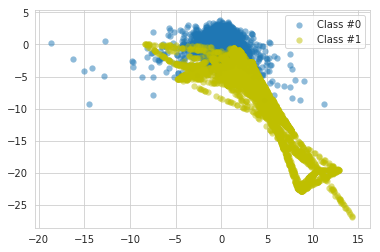

In [26]:
# Define the resampling method
method = SMOTE(kind="regular")

# Create the resampled feature set
X_resampled, y_resampled = method.fit_sample(X, y)

def plot_data(X,y):
    plt.scatter(X[y == 0, 0], X[y == 0, 1], label="Class #0", alpha=0.5, linewidth=0.15)
    plt.scatter(X[y == 1, 0], X[y == 1, 1], label="Class #1", alpha=0.5, linewidth=0.15, c='y')
    plt.legend()
    return plt.show()

plot_data(X_resampled, y_resampled)

## Compare SMOTE to original data

In the last exercise, you saw that using SMOTE suddenly gives us more observations of the minority class. Let's compare those results to our original data, to get a good feeling for what has actually happened. Let's have a look at the value counts again of our old and new data, and let's plot the two scatter plots of the data side by side. You'll use the function compare_plot() for that that, which takes the following arguments: X, y, X_resampled, y_resampled, method=''. The function plots your original data in a scatter plot, along with the resampled side by side.

In [27]:
# Print the value_counts on the original labels y
print(pd.value_counts(pd.Series(y)))

0.0    5000
1.0      50
dtype: int64


In [28]:
# Print the value_counts
print(pd.value_counts(pd.Series(y_resampled)))

1.0    5000
0.0    5000
dtype: int64


In [29]:
def compare_plot(X,y,X_resampled,y_resampled, method):
    # Start a plot figure
    f, (ax1, ax2) = plt.subplots(1, 2)
    # sub-plot number 1, this is our normal data
    c0 = ax1.scatter(X[y == 0, 0], X[y == 0, 1], label="Class #0",alpha=0.5)
    c1 = ax1.scatter(X[y == 1, 0], X[y == 1, 1], label="Class #1",alpha=0.5, c='r')
    ax1.set_title('Original set')
    # sub-plot number 2, this is our oversampled data
    ax2.scatter(X_resampled[y_resampled == 0, 0], X_resampled[y_resampled == 0, 1], label="Class #0", alpha=.5)
    ax2.scatter(X_resampled[y_resampled == 1, 0], X_resampled[y_resampled == 1, 1], label="Class #1", alpha=.5,c='r')
    ax2.set_title(method)
    # some settings and ready to go
    plt.figlegend((c0, c1), ('Class #0', 'Class #1'), loc='lower center',
                  ncol=2, labelspacing=0.)
    #plt.tight_layout(pad=3)
    return plt.show()

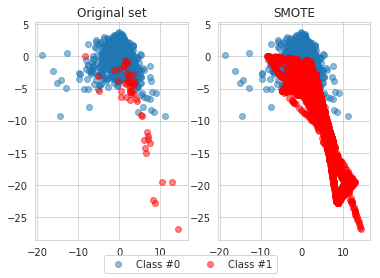

In [30]:
compare_plot(X, y, X_resampled, y_resampled, method='SMOTE')

# 1.2. Fraud detection algorithms in action

In [31]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [32]:
'''Split features & labels'''
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

printListItemLength([X_train, X_test, y_train, y_test])

4040
1010
4040
1010


In [33]:
model = LinearRegression()
model.fit(X_train, y_train)
model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [34]:
predicted = model.predict(X_test)
predicted

array([ 0.00080154,  0.00504754,  0.01469733, ...,  0.00772163,
        0.04905729, -0.00394464])

In [35]:
print(metrics.r2_score(y_test, predicted))

0.4149952608127676


## Exploring the traditional way to catch fraud

In this exercise you're going to try finding fraud cases in our credit card dataset the "old way". First you'll define threshold values using common statistics, to split fraud and non-fraud. Then, use those thresholds on your features to detect fraud. This is common practice within fraud analytics teams.

Statistical thresholds are often determined by looking at the mean values of observations. Let's start this exercise by checking whether feature means differ between fraud and non-fraud cases. Then, you'll use that information to create common sense thresholds. Finally, you'll check how well this performs in fraud detection.

pandas has already been imported as pd

In [36]:
# Get the mean for each group
df1_2.groupby('Class').mean()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0.035030,0.011553,0.037444,-0.045760,-0.013825,-0.030885,0.014315,-0.022432,-0.002227,0.001667,-0.004511,0.017434,0.004204,0.006542,-0.026640,0.001190,0.004481,-0.010892,-0.016554,-0.002896,-0.010583,-0.010206,-0.003305,-0.000918,-0.002613,-0.004651,-0.009584,0.002414,85.843714
1,-4.985211,3.321539,-7.293909,4.827952,-3.326587,-1.591882,-5.776541,1.395058,-2.537728,-5.917934,4.020563,-7.032865,-0.104179,-7.100399,-0.120265,-4.658854,-7.589219,-2.650436,0.894255,0.194580,0.703182,0.069065,-0.088374,-0.029425,-0.073336,-0.023377,0.380072,0.009304,113.469000


In [37]:
# Implement a rule for stating which cases are flagged as fraud
df1_2['flag_as_fraud'] = np.where(np.logical_and(df1_2['V1']< -3, df1_2['V3']< -5), 1, 0)

In [38]:
# Create a crosstab of flagged fraud cases versus the actual fraud cases
print(pd.crosstab(df1_2.Class, df1_2.flag_as_fraud, rownames=['Actual Fraud'], colnames=['Flagged Fraud']))

Flagged Fraud     0   1
Actual Fraud           
0              4984  16
1                28  22


## Using ML classification to catch fraud

In this exercise you'll see what happens when you use a simple machine learning model on our credit card data instead.

Do you think you can beat those results? Remember, you've predicted 22 out of 50 fraud cases, and had 16 false positives.

So with that in mind, let's implement a Logistic Regression model. If you have taken the class on supervised learning in Python, you should be familiar with this model. If not, you might want to refresh that at this point. But don't worry, you'll be guided through the structure of the machine learning model.

The X and y variables are available in your workspace.

In [39]:
# Create the training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3535, 28), (1515, 28), (3535,), (1515,))

In [40]:
# Fit a logistic regression model to our data
model = LogisticRegression()
model.fit(X_train, y_train)

# Obtain model predictions
predicted = model.predict(X_test)

/home/anonymous/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [41]:
# Print the classifcation report and confusion matrix
print('Classification report:\n', classification_report(y_test, predicted))
conf_mat = confusion_matrix(y_true=y_test, y_pred=predicted)
print('Confusion matrix:\n', conf_mat)

Classification report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1505
         1.0       0.89      0.80      0.84        10

    accuracy                           1.00      1515
   macro avg       0.94      0.90      0.92      1515
weighted avg       1.00      1.00      1.00      1515

Confusion matrix:
 [[1504    1]
 [   2    8]]


## Logistic regression combined with SMOTE

In this exercise, you're going to take the Logistic Regression model from the previous exercise, and combine that with a SMOTE resampling method. We'll show you how to do that efficiently by using a pipeline that combines the resampling method with the model in one go. First, you need to define the pipeline that you're going to use.

In [42]:
# This is the pipeline module we need for this from imblearn
from imblearn.pipeline import Pipeline 

In [43]:
# Define which resampling method and which ML model to use in the pipeline
resampling = SMOTE(kind="borderline2")
model = LogisticRegression()

In [44]:
# Define the pipeline, tell it to combine SMOTE with the Logistic Regression model
pipeline = Pipeline([('SMOTE', resampling), ('Logistic Regression', model)])

## Using a pipeline

Now that you have our pipeline defined, aka combining a logistic regression with a SMOTE method, let's run it on the data. You can treat the pipeline as if it were a single machine learning model. Our data X and y are already defined, and the pipeline is defined in the previous exercise. Are you curious to find out what the model results are? Let's give it a try!

In [45]:
# Split your data X and y, into a training and a test set and fit the pipeline onto the training data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [46]:
# Fit your pipeline onto your training set and obtain predictions by fitting the model onto the test data 
pipeline.fit(X_train, y_train) 
predicted = pipeline.predict(X_test)

/home/anonymous/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [47]:
# Obtain the results from the classification report and confusion matrix 
print('Classifcation report:\n', classification_report(y_test, predicted))
conf_mat = confusion_matrix(y_true=y_test, y_pred=predicted)
print('Confusion matrix:\n', conf_mat)

Classifcation report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1505
         1.0       0.67      1.00      0.80        10

    accuracy                           1.00      1515
   macro avg       0.83      1.00      0.90      1515
weighted avg       1.00      1.00      1.00      1515

Confusion matrix:
 [[1500    5]
 [   0   10]]


# 2. Review of classification methods for fraud detection

In [48]:
df2_1 = pd.read_csv('data/chapter_2/creditcard_sampledata_2.csv', index_col=0)
df2_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7300 entries, 221547 to 145800
Data columns (total 30 columns):
V1        7300 non-null float64
V2        7300 non-null float64
V3        7300 non-null float64
V4        7300 non-null float64
V5        7300 non-null float64
V6        7300 non-null float64
V7        7300 non-null float64
V8        7300 non-null float64
V9        7300 non-null float64
V10       7300 non-null float64
V11       7300 non-null float64
V12       7300 non-null float64
V13       7300 non-null float64
V14       7300 non-null float64
V15       7300 non-null float64
V16       7300 non-null float64
V17       7300 non-null float64
V18       7300 non-null float64
V19       7300 non-null float64
V20       7300 non-null float64
V21       7300 non-null float64
V22       7300 non-null float64
V23       7300 non-null float64
V24       7300 non-null float64
V25       7300 non-null float64
V26       7300 non-null float64
V27       7300 non-null float64
V28       7300 non-nul

In [49]:
from sklearn.ensemble import RandomForestClassifier

In [50]:
model = RandomForestClassifier(random_state=42)
labels = df2_1.columns[:-1]
X = df2_1[labels]
y = df2_1['Class']

In [51]:
model.fit(X_train, y_train)
predicted = model.predict(X_test)
print(metrics.accuracy_score(y_test, predicted))

0.9993399339933994


/home/anonymous/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [52]:
probs = model.predict_proba(X_test)
probs

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

## Natural hit rate

In this exercise, you'll again use credit card transaction data. The features and labels are similar to the data in the previous chapter, and the data is heavily imbalanced. We've given you features X and labels y to work with already, which are both numpy arrays.

First you need to explore how prevalent fraud is in the dataset, to understand what the "natural accuracy" is, if we were to predict everything as non-fraud. It's is important to understand which level of "accuracy" you need to "beat" in order to get a better prediction than by doing nothing. In the following exercises, you'll create our first random forest classifier for fraud detection. That will serve as the "baseline" model that you're going to try to improve in the upcoming exercises.

In [53]:
X, y = prep_data(df2_1)
X.shape, y.shape

((7300, 28), (7300,))

In [54]:
# Count the total number of observations from the length of y
total_obs = len(y)
total_obs

7300

In [55]:
# Count the total number of non-fraudulent observations 
non_fraud = [i for i in y if i==0]
count_non_fraud = non_fraud.count(0)
count_non_fraud

7000

In [56]:
pd.value_counts(pd.Series(y))

0.0    7000
1.0     300
dtype: int64

In [57]:
# Calculate the percentage of non fraud observations in the dataset
percentage = (float(count_non_fraud)/float(total_obs)) * 100

# Print the percentage: this is our "natural accuracy" by doing nothing
print(percentage)

95.8904109589041


## Random Forest Classifier - part 1

Let's now create a first random forest classifier for fraud detection. Hopefully you can do better than the baseline accuracy you've just calculated, which was roughly 96%. This model will serve as the "baseline" model that you're going to try to improve in the upcoming exercises. Let's start first with splitting the data into a test and training set, and defining the Random Forest model. The data available are features X and labels y.

In [58]:
# Import the random forest model from sklearn
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [59]:
# Split your data into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Define the model as the random forest
model = RandomForestClassifier(random_state=5)

## Random Forest Classifier - part 2

Let's see how our Random Forest model performs without doing anything special to it. The model from the previous exercise is available, and you've already split your data in X_train, y_train, X_test, y_test.

In [60]:
# Fit the model to our training set
model.fit(X_train, y_train)

# Obtain predictions from the test data 
predicted = model.predict(X_test)

# Print the accuracy performance metric
print(accuracy_score(y_test, predicted))

/home/anonymous/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.9904109589041096


What is a benefit of using Random Forests versus Decision Trees?

Random Forest prevents overfitting most of the time, by creating random subsets of the features and building smaller trees using these subsets. Afterwards, it combines the subtrees of subsamples of features, so it does not tend to overfit to your entire feature set the way "deep" Decisions Trees do.

# 2.1. Measuring fraud detection performance

In [61]:
average_precision = metrics.average_precision_score(y_test, predicted)
average_precision

0.7787512775616596

In [62]:
precision, recall, threshold = metrics.precision_recall_curve(y_test, predicted)
precision, recall, threshold

(array([0.04155251, 0.96052632, 1.        ]),
 array([1.       , 0.8021978, 0.       ]),
 array([0., 1.]))

In [63]:
'''Calculate F1 score'''
f1 = metrics.f1_score(y_test, predicted)
f1

0.874251497005988

In [64]:
'''Calculate precision-recall AUC'''
auc = metrics.auc(recall, precision)
auc

0.8854716480347339

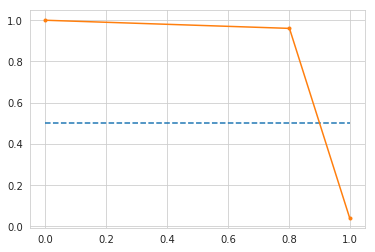

In [65]:
plt.plot([0,1], [0.5,0.5], linestyle='--')
plt.plot(recall, precision, marker='.')
plt.show()

In [66]:
print(metrics.roc_auc_score(y_test, probs[:, 1]))

ValueError: Found input variables with inconsistent numbers of samples: [2190, 1515]

In [67]:
print(classification_report(y_test, predicted))

              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00      2099
         1.0       0.96      0.80      0.87        91

    accuracy                           0.99      2190
   macro avg       0.98      0.90      0.93      2190
weighted avg       0.99      0.99      0.99      2190



In [68]:
print(confusion_matrix(y_test, predicted))

[[2096    3]
 [  18   73]]


## Performance metrics for the RF model

In the previous exercises you obtained an accuracy score for your random forest model. This time, we know accuracy can be misleading in the case of fraud detection. With highly imbalanced fraud data, the AUROC curve is a more reliable performance metric, used to compare different classifiers. Moreover, the classification report tells you about the precision and recall of your model, whilst the confusion matrix actually shows how many fraud cases you can predict correctly. So let's get these performance metrics.

You'll continue working on the same random forest model from the previous exercise. Your model, defined as model = RandomForestClassifier(random_state=5) has been fitted to your training data already, and X_train, y_train, X_test, y_test are available.

In [61]:
# Import the packages to get the different performance metrics
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

In [62]:
# Obtain the predictions from our random forest model 
predicted = model.predict(X_test)

# Predict probabilities
probs = model.predict_proba(X_test)

# Print the ROC curve, classification report and confusion matrix
print(metrics.roc_auc_score(y_test, probs[:,1]))
print(classification_report(y_test, predicted))
print(confusion_matrix(y_test, predicted))

0.9338879319822626
              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00      2099
         1.0       0.96      0.80      0.87        91

    accuracy                           0.99      2190
   macro avg       0.98      0.90      0.93      2190
weighted avg       0.99      0.99      0.99      2190

[[2096    3]
 [  18   73]]


## Plotting the Precision Recall Curve

You can also plot a Precision-Recall curve, to investigate the trade-off between the two in your model. In this curve Precision and Recall are inversely related; as Precision increases, Recall falls and vice-versa. A balance between these two needs to be achieved in your model, otherwise you might end up with many false positives, or not enough actual fraud cases caught. To achieve this and to compare performance, the precision-recall curves come in handy.

Your Random Forest Classifier is available as model, and the predictions as predicted. You can simply obtain the average precision score and the PR curve from the sklearn package. The function plot_pr_curve() plots the results for you. Let's give it a try.

In [63]:
from sklearn.metrics import average_precision_score, precision_recall_curve

# Calculate average precision and the PR curve
average_precision_score(y_test, predicted)

0.7787512775616596

In [64]:
# Calculate average precision and the PR curve
average_precision = average_precision_score(y_test, predicted)

# Obtain precision and recall 
precision, recall, _ = precision_recall_curve(y_test, predicted)

In [65]:
def plot_pr_curve(recall, precision, average_precision):
    plt.step(recall, precision, color='b', alpha=0.2, where='post')
    plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(average_precision))
    plt.show()

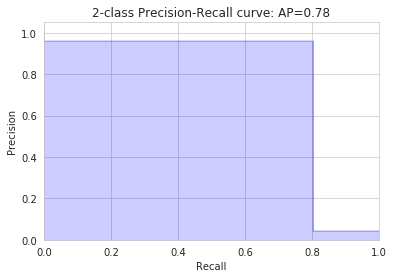

In [66]:
# Plot the recall precision tradeoff
plot_pr_curve(recall, precision, average_precision)

What's the benefit of the performance metric ROC curve (AUROC) versus Precision and Recall?

The key difference between the two performance metrics, is that ROC curves will be the same no matter what the baseline probability is. Precision and Recall may be more useful in practice for needle-in-haystack type problems, or problems where the "positive" class is more interesting than the negative class.

The ROC curve plots the true positives vs. false positives , for a classifier, as its discrimination threshold is varied. Since, a random method describes a horizontal curve through the unit interval, it has an AUC of 0.5. Minimally, classifiers should perform better than this, and the extent to which they score higher than one another (meaning the area under the ROC curve is larger), they have better expected performance.

# 2.2. Adjusting your algorithms for fraud detection

In [67]:
from sklearn.svm import SVC

In [68]:
'''Balanced weight'''

model = RandomForestClassifier(class_weight='balanced')
model = RandomForestClassifier(class_weight='balanced_subsample')
model = LogisticRegression(class_weight='balanced')
model = SVC(kernel='linear', class_weight='balanced', probability=True)

In [69]:
'''Hyperparameter tuning for fraud detection'''

model = RandomForestClassifier(class_weight={0:1,1:4}, random_state=1)
model = LogisticRegression(class_weight={0:1,1:4}, random_state=1)

model = RandomForestClassifier(n_estimators=10, criterion='gini', max_depth=None, 
                               min_samples_split=2,min_samples_leaf=1, 
                               max_features='auto', n_jobs=-1, class_weight=None)

In [70]:
from sklearn.model_selection import GridSearchCV

In [71]:
param_grid = {
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}

In [72]:
model = RandomForestClassifier()

In [73]:
%%time
grid_search_model = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1, scoring='f1')
grid_search_model.fit(X_train, y_train)

CPU times: user 5.89 s, sys: 207 ms, total: 6.09 s
Wall time: 18min 34s


In [74]:
'''Get the optimal parameters'''
grid_search_model.best_params_

{'max_depth': 80,
 'max_features': 3,
 'min_samples_leaf': 3,
 'min_samples_split': 12,
 'n_estimators': 100}

In [75]:
'''Get the best estimator results'''
grid_search_model.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=80, max_features=3, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=12,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [76]:
grid_search_model.best_score_

0.8980316943491291

## Model adjustments

A simple way to adjust the random forest model to deal with highly imbalanced fraud data, is to use the class_weights option when defining your sklearn model. However, as you will see, it is a bit of a blunt force mechanism and might not work for your very special case.

In this exercise you'll explore the weight = "balanced_subsample" mode the Random Forest model from the earlier exercise. You already have split your data in a training and test set, i.e X_train, X_test, y_train, y_test are available. The metrics function have already been imported.

In [77]:
# Define the model with balanced subsample
model = RandomForestClassifier(class_weight='balanced_subsample', random_state=5)

# Fit your training model to your training set
model.fit(X_train, y_train)

# Obtain the predicted values and probabilities from the model 
predicted = model.predict(X_test)
probs = model.predict_proba(X_test)

# Print the roc_auc_score, the classification report and confusion matrix
print(metrics.roc_auc_score(y_test, probs[:, 1]))
print(classification_report(y_test, predicted))
print(confusion_matrix(y_test, predicted))

0.9347962661445273
              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00      2099
         1.0       0.99      0.79      0.88        91

    accuracy                           0.99      2190
   macro avg       0.99      0.90      0.94      2190
weighted avg       0.99      0.99      0.99      2190

[[2098    1]
 [  19   72]]


/home/anonymous/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


## Adjusting your Random Forest to fraud detection

In this exercise you're going to dive into the options for the random forest classifier, as we'll assign weights and tweak the shape of the decision trees in the forest. You'll define weights manually, to be able to off-set that imbalance slightly. In our case we have 300 fraud to 7000 non-fraud cases, so by setting the weight ratio to 1:12, we get to a 1/3 fraud to 2/3 non-fraud ratio, which is good enough for training the model on.

The data in this exercise has already been split into training and test set, so you just need to focus on defining your model. You can then use the function get_model_results() as a short cut. This function fits the model to your training data, predicts and obtains performance metrics similar to the steps you did in the previous exercises.

In [78]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((5110, 28), (5110,), (2190, 28), (2190,))

In [79]:
def get_model_results(X_train, y_train, X_test, y_test, model):
    model.fit(X_train, y_train)
    predicted = model.predict(X_test)
    probs = model.predict_proba(X_test)
    print (classification_report(y_test, predicted))
    print (confusion_matrix(y_test, predicted))

In [80]:
# Change the model options
model = RandomForestClassifier(bootstrap=True, class_weight={0:1, 1:12}, criterion='entropy',
    # Change depth of model
    max_depth=10,
    # Change the number of samples in leaf nodes
    min_samples_leaf=10, 
    # Change the number of trees to use
    n_estimators=20, n_jobs=-1, random_state=5)

# Run the function get_model_results
get_model_results(X_train, y_train, X_test, y_test, model)

              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00      2099
         1.0       0.97      0.85      0.91        91

    accuracy                           0.99      2190
   macro avg       0.98      0.92      0.95      2190
weighted avg       0.99      0.99      0.99      2190

[[2097    2]
 [  14   77]]


## GridSearchCV to find optimal parameters

In this exercise you're going to tweak our model in a less "random" way, but use GridSearchCV to do the work for you.

With GridSearchCV you can define which performance metric to score the options on. Since for fraud detection we are mostly interested in catching as many fraud cases as possible, you can optimize your model settings to get the best possible Recall score. If you also cared about reducing the number of false positives, you could optimize on F1-score, this gives you that nice Precision-Recall trade-off.

GridSearchCV has already been imported from sklearn.model_selection, so let's give it a try!

In [81]:
# Define the parameter sets to test
param_grid = {'n_estimators': [1, 30], 'max_features': ['auto', 'log2'], 
              'max_depth': [4, 8], 'criterion': ['gini', 'entropy']
}

# Define the model to use
model = RandomForestClassifier(random_state=5)

# Combine the parameter sets with the defined model
CV_model = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='recall', n_jobs=-1)

# Fit the model to our training data and obtain best parameters
CV_model.fit(X_train, y_train)
CV_model.best_params_

{'criterion': 'gini',
 'max_depth': 8,
 'max_features': 'log2',
 'n_estimators': 30}

## Model results using GridSearchCV

You discovered that the best parameters for your model are that the split criterion should be set to 'gini', the number of estimators (trees) should be 30, the maximum depth of the model should be 8 and the maximum features should be set to "log2".

Let's give this a try and see how well our model performs. You can use the get_model_results() function again to save time.

In [82]:
# Input the optimal parameters in the model
model = RandomForestClassifier(class_weight={0:1,1:12}, criterion='gini', 
                               max_depth=8, max_features='log2', 
                               min_samples_leaf=10, n_estimators=30, 
                               n_jobs=-1, random_state=5)

# Get results from your model
get_model_results(X_train, y_train, X_test, y_test, model)

              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00      2099
         1.0       0.95      0.84      0.89        91

    accuracy                           0.99      2190
   macro avg       0.97      0.92      0.94      2190
weighted avg       0.99      0.99      0.99      2190

[[2095    4]
 [  15   76]]


# 2.3. Using ensemble methods to improve fraud detection

In [83]:
from sklearn.ensemble import VotingClassifier
from sklearn.naive_bayes import GaussianNB

In [84]:
clf1 = LogisticRegression(random_state=1)
clf2 = RandomForestClassifier(random_state=1)
clf3 = GaussianNB()

In [85]:
ensemble_model = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('gnb', clf3)], voting='hard')

In [86]:
ensemble_model.fit(X_train, y_train)
ensemble_model.predict(X_test)

/home/anonymous/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/anonymous/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


array([0., 0., 0., ..., 0., 0., 0.])

In [87]:
VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('gnb', clf3)], voting='soft', weights=[2,1,1])

VotingClassifier(estimators=[('lr',
                              LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='warn',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=1, solver='warn',
                                                 tol=0.0001, verbose=0,
                                                 warm_start=False)),
                             ('rf',
                              RandomForestClassifier(bootstrap=True,
                                                     class_weight=None,
                                                     criterion='gini',
                                              

## Logistic Regression

In this last lesson you'll combine three algorithms into one model with the VotingClassifier. This allows us to benefit from the different aspects from all models, and hopefully improve overall performance and detect more fraud. The first model, the Logistic Regression, has a slightly higher recall score than our optimal Random Forest model, but gives a lot more false positives. You'll also add a Decision Tree with balanced weights to it. The data is already split into a training and test set, i.e. X_train, y_train, X_test, y_test are available.

In order to understand how the Voting Classifier can potentially improve your original model, you should check the standalone results of the Logistic Regression model first.

In [88]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((5110, 28), (5110,), (2190, 28), (2190,))

In [89]:
# Define the Logistic Regression model with weights
model = LogisticRegression(class_weight={0:1, 1:15}, random_state=5)

# Get the model results
get_model_results(X_train, y_train, X_test, y_test, model)

              precision    recall  f1-score   support

         0.0       0.99      0.98      0.99      2099
         1.0       0.63      0.88      0.73        91

    accuracy                           0.97      2190
   macro avg       0.81      0.93      0.86      2190
weighted avg       0.98      0.97      0.98      2190

[[2052   47]
 [  11   80]]


/home/anonymous/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


## Voting Classifier

Let's now combine three machine learning models into one, to improve our Random Forest fraud detection model from before. You'll combine our usual Random Forest model, with the Logistic Regression from the previous exercise, with a simple Decision Tree. You can use the short cut get_model_results() to see the immediate result of the ensemble model.

In [90]:
def get_model_results(X_train, y_train, X_test, y_test, model):
    model.fit(X_train, y_train)
    predicted = model.predict(X_test)
    #probs = model.predict_proba(X_test)
    print (classification_report(y_test, predicted))
    print (confusion_matrix(y_test, predicted))

In [91]:
# Import the package
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier

# Define the three classifiers to use in the ensemble
clf1 = LogisticRegression(class_weight={0:1, 1:15}, random_state=5)
clf2 = RandomForestClassifier(class_weight={0:1, 1:12}, criterion='gini', max_depth=8, max_features='log2',
            min_samples_leaf=10, n_estimators=30, n_jobs=-1, random_state=5)
clf3 = DecisionTreeClassifier(random_state=5, class_weight="balanced")

# Combine the classifiers in the ensemble model
ensemble_model = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('dt', clf3)], voting='hard')

# Get the results 
get_model_results(X_train, y_train, X_test, y_test, ensemble_model)

/home/anonymous/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99      2099
         1.0       0.90      0.86      0.88        91

    accuracy                           0.99      2190
   macro avg       0.95      0.93      0.94      2190
weighted avg       0.99      0.99      0.99      2190

[[2090    9]
 [  13   78]]


The Logistic Regression as a standalone was quite bad in terms of false positives, and the Random Forest was worse in terms of false negatives. By combining these together you indeed managed to improve performance

## Adjust weights within the Voting Classifier

You've just seen that the Voting Classifier allows you to improve your fraud detection performance, by combining good aspects from multiple models. Now let's try to adjust the weights we give to these models. By increasing or decreasing weights you can play with how much emphasis you give to a particular model relative to the rest. This comes in handy when a certain model has overall better performance than the rest, but you still want to combine aspects of the others to further improve your results.

For this exercise the data is already split into a training and test set, and clf1, clf2 and clf3 are available and defined as before, i.e. they are the Logistic Regression, the Random Forest model and the Decision Tree respectively.

In [92]:
# Define the ensemble model
ensemble_model = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('gnb', clf3)], 
                                  voting='soft', weights=[1,4,1], flatten_transform=True)

# Get results 
get_model_results(X_train, y_train, X_test, y_test, ensemble_model)

/home/anonymous/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00      2099
         1.0       0.94      0.85      0.89        91

    accuracy                           0.99      2190
   macro avg       0.97      0.92      0.94      2190
weighted avg       0.99      0.99      0.99      2190

[[2094    5]
 [  14   77]]


# 3. Normal versus abnormal behaviour

In [93]:
df3_1 = pd.read_csv('data/chapter_3/banksim_adj.csv', index_col=0)
df3_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7189 entries, 0 to 7199
Data columns (total 18 columns):
age                      7189 non-null int64
amount                   7189 non-null float64
fraud                    7189 non-null int64
M                        7189 non-null int64
es_barsandrestaurants    7189 non-null int64
es_contents              7189 non-null int64
es_fashion               7189 non-null int64
es_food                  7189 non-null int64
es_health                7189 non-null int64
es_home                  7189 non-null int64
es_hotelservices         7189 non-null int64
es_hyper                 7189 non-null int64
es_leisure               7189 non-null int64
es_otherservices         7189 non-null int64
es_sportsandtoys         7189 non-null int64
es_tech                  7189 non-null int64
es_transportation        7189 non-null int64
es_travel                7189 non-null int64
dtypes: float64(1), int64(17)
memory usage: 1.0 MB


In [94]:
df3_2 = pd.read_csv('data/chapter_3/banksim.csv', index_col=0)
df3_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7200 entries, 171915 to 579286
Data columns (total 5 columns):
age         7200 non-null object
gender      7200 non-null object
category    7200 non-null object
amount      7200 non-null float64
fraud       7200 non-null int64
dtypes: float64(1), int64(1), object(3)
memory usage: 337.5+ KB


In [95]:
df3_3 = pd.read_pickle('data/chapter_3/db_full.pickle')
df3_3

DBSCAN(algorithm='auto', eps=0.9, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=10, n_jobs=-1, p=None)

In [96]:
df3_4 = pd.read_pickle('data/chapter_3/labels_full.pickle')
df3_4[:10]

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
9    0
Name: fraud, dtype: int64

In [97]:
df3_4.value_counts()

0    6989
1     200
Name: fraud, dtype: int64

In [98]:
df3_5 = pd.read_pickle('data/chapter_3/labels.pickle')
df3_5[:10]

4656    0
3579    0
3474    0
1501    0
6221    0
6407    0
3823    0
471     0
705     0
3670    0
Name: fraud, dtype: int64

In [99]:
df3_5.value_counts()

0    3000
1     100
Name: fraud, dtype: int64

In [100]:
df3_6 = pd.read_pickle('data/chapter_3/x_scaled.pickle')
df3_6[0]

array([0.83333333, 0.01910336, 1.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       1.        , 0.        ])

In [101]:
def npValueCounts(Array):
    '''
    Return numpy array value counts as a pandas dataframe
    
    Parameters
    ----------
    Array: np.array
    
    Result
    ------
    Pandas dataframe
    '''
    import numpy as np
    import pandas as pd
    
    unique, counts = np.unique(Array, return_counts=True)
    unique_counts = {'value': list(unique), 'count': list(counts)}
    df = pd.DataFrame.from_dict(unique_counts)
    return df

In [102]:
npValueCounts(df3_6).sort_values('count', ascending=False).head()

,value,count
0,0.000000,42152
2418,1.000000,4621
2266,0.333333,1015
2345,0.500000,733
2380,0.666667,568


In [103]:
df3_7 = pd.read_pickle('data/chapter_3/x_scawed_full.pickle')
df3_7[0]

array([0.5       , 0.20681002, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       1.        , 0.        ])

In [104]:
npValueCounts(df3_7).sort_values('count', ascending=False).head()

,value,count
0,0.000000,97814
4389,1.000000,10660
4043,0.333333,2333
4218,0.500000,1718
4311,0.666667,1279


In [105]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

## KMeans

In [106]:
X = np.array(df2_1).astype(np.float)
X

array([[-1.19166848e+00,  4.28408570e-01,  1.64002800e+00, ...,
        -1.74444289e-02,  2.74400000e+01,  0.00000000e+00],
       [ 1.96661435e+00, -4.50086974e-01, -1.22858598e+00, ...,
        -7.13139301e-02,  3.59500000e+01,  0.00000000e+00],
       [ 1.52845161e+00, -1.29619125e+00, -8.90676942e-01, ...,
         2.58531705e-02,  2.84000000e+01,  0.00000000e+00],
       ...,
       [-3.61427839e-01,  1.13347192e+00, -2.97136044e+00, ...,
        -1.82750897e-01,  4.80720000e+02,  1.00000000e+00],
       [-1.14155894e+00,  1.92765004e+00, -3.90535615e+00, ...,
         7.62114891e-02,  2.50000000e+01,  1.00000000e+00],
       [-4.19820174e-01, -1.15597801e+00, -2.09251550e+00, ...,
         1.29096386e-01,  4.51270000e+02,  1.00000000e+00]])

In [107]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
kmeans = KMeans(n_clusters=6, random_state=42).fit(X_scaled)
kmeans

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

## Right amount of clusters

In [108]:
clust = range(1, 10)
kmeans = [KMeans(n_clusters=i) for i in clust]
score = [kmeans[i].fit(X_scaled).score(X_scaled) for i in range(len(kmeans))]
score

[-1319.2623146279884,
 -871.8713924662665,
 -793.9840366659471,
 -716.0267521695544,
 -677.0290872392054,
 -648.3514857188896,
 -625.8868409186289,
 -605.8046703920188,
 -590.3722805051179]

## Elbow curve
https://en.wikipedia.org/wiki/Elbow_method_(clustering)

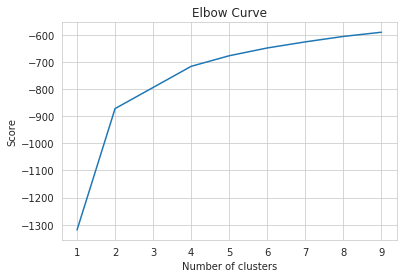

In [109]:
plt.plot(clust, score)
plt.xlabel('Number of clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

## Exploring your data

In the next exercises, you will be looking at bank payment transaction data. The financial transactions are categorized by type of expense, as well as the amount spent. Moreover, you have some client characteristics available such as age group and gender. Some of the transactions are labelled as fraud; you'll treat these labels as given and will use those to validate the results.

When using unsupervised learning techniques for fraud detection, you want to distinguish normal from abnormal (thus potentially fraudulent) behavior. As a fraud analyst to understand what is "normal", you need to have a good understanding of the data and its characteristics. Let's explore the data in this first exercise.

In [110]:
# Get the dataframe shape
df3_2.shape

# Display the first 5 rows
df3_2.head()

# Groupby categories and take the mean
print(df3_2.groupby('category').mean())

                           amount     fraud
category                                   
es_barsandrestaurants   43.841793  0.022472
es_contents             55.170000  0.000000
es_fashion              59.780769  0.020619
es_food                 35.216050  0.000000
es_health              126.604704  0.242798
es_home                120.688317  0.208333
es_hotelservices       172.756245  0.548387
es_hyper                46.788180  0.125000
es_leisure             229.757600  1.000000
es_otherservices       149.648960  0.600000
es_sportsandtoys       157.251737  0.657895
es_tech                132.852862  0.179487
es_transportation       27.422014  0.000000
es_travel              231.818656  0.944444
es_wellnessandbeauty    66.167078  0.060606


## Customer segmentation

In this exercise you're going to check whether there are any obvious patterns for the clients in this data, thus whether you need to segment your data into groups, or whether the data is rather homogenous.

You unfortunately don't have a lot client information available; you can't for example distinguish between the wealth levels of different clients. However, there is data on **age ** available, so let's see whether there is any significant difference between behavior of age groups.

In [111]:
# Group by age groups and get the mean
df3_2.groupby('age').mean()

# Count the values of the observations in each age group
print(df3_2['age'].value_counts())

2    2333
3    1718
4    1279
5     792
1     713
6     314
0      40
U      11
Name: age, dtype: int64


## Using statistics to define normal behavior

In the previous exercises we saw that fraud is more prevalent in certain transaction categories, but that there is no obvious way to segment our data into for example age groups. This time, let's investigate the average amounts spend in normal transactions versus fraud transactions. This gives you an idea of how fraudulent transactions differ structurally from normal transactions.

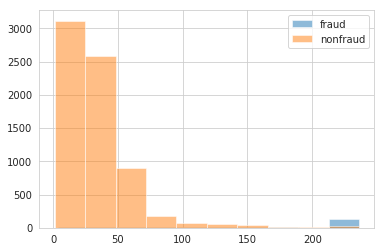

In [112]:
# Create two dataframes with fraud and non-fraud data 
df3_2_fraud = df3_2.loc[df3_2.fraud == 1] 
df3_2_non_fraud = df3_2.loc[df3_2.fraud == 0]

# Plot histograms of the amounts in fraud and non-fraud data 
plt.hist(df3_2_fraud.amount, alpha=0.5, label='fraud')
plt.hist(df3_2_non_fraud.amount, alpha=0.5, label='nonfraud')
plt.legend()
plt.show()

## Scaling the data

For ML algorithms using distance based metrics, it is crucial to always scale your data, as features using different scales will distort your results. K-means uses the Euclidian distance to assess distance to cluster centroids, therefore you first need to scale your data before continuing to implement the algorithm. Let's do that first.

Available is the dataframe df from the previous exercise, with some minor data preparation done so it is ready for you to use with sklearn. The fraud labels are separately stored under labels, you can use those to check the results later. numpy has been imported as np.

In [126]:
df3_1.head()

,age,amount,fraud,M,es_barsandrestaurants,es_contents,es_fashion,es_food,es_health,es_home,es_hotelservices,es_hyper,es_leisure,es_otherservices,es_sportsandtoys,es_tech,es_transportation,es_travel
0,3,49.71,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,4,39.29,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,3,18.76,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,4,13.95,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,2,49.87,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [123]:
df3_1['fraud'].value_counts()

0    6989
1     200
Name: fraud, dtype: int64

In [127]:
y = df3_1['fraud']
y.shape

(7189,)

In [132]:
# Import the scaler
from sklearn.preprocessing import MinMaxScaler

# Take the float values of df3_1 for X
X = df3_1.loc[:, df3_1.columns != 'fraud'].values.astype(np.float)

# Define the scaler and apply to the data
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [134]:
X.shape, X_scaled.shape

((7189, 17), (7189, 17))

## K-means clustering

A very commonly used clustering algorithm is K-means clustering. For fraud detection, K-means clustering is straightforward to implement and relatively powerful in predicting suspicious cases. It is a good algorithm to start with when working on fraud detection problems. However, fraud data is oftentimes very large, especially when you are working with transaction data. MiniBatch K-means is an efficient way to implement K-means on a large dataset, which you will use in this exercise.

The scaled data from the previous exercise, X_scaled is available. Let's give it a try.

In [135]:
# Import MiniBatchKmeans 
from sklearn.cluster import MiniBatchKMeans

# Define the model 
kmeans = MiniBatchKMeans(n_clusters=8, random_state=0)

# Fit the model to the scaled data
kmeans.fit(X_scaled)

MiniBatchKMeans(batch_size=100, compute_labels=True, init='k-means++',
                init_size=None, max_iter=100, max_no_improvement=10,
                n_clusters=8, n_init=3, random_state=0, reassignment_ratio=0.01,
                tol=0.0, verbose=0)

## Elbow method

In the previous exercise you've implemented MiniBatch K-means with 8 clusters, without actually checking what the right amount of clusters should be. For our first fraud detection approach, it is important to get the number of clusters right, especially when you want to use the outliers of those clusters as fraud predictions. To decide which amount of clusters you're going to use, let's apply the Elbow method and see what the optimal number of clusters should be based on this method.

X_scaled is again available for you to use and MiniBatchKMeans has been imported from sklearn.

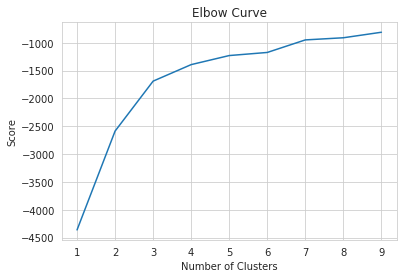

In [136]:
# Define the range of clusters to try
clustno = range(1, 10)

# Run MiniBatch Kmeans over the number of clusters
kmeans = [MiniBatchKMeans(n_clusters=i) for i in clustno]

# Obtain the score for each model
score = [kmeans[i].fit(X_scaled).score(X_scaled) for i in range(len(kmeans))]

# Plot the models and their respective score 
plt.plot(clustno, score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

# 3.1. Assigning fraud versus non-fraud cases

In [116]:
'''Run KMeans model on scaled data'''
kmeans = KMeans(n_clusters=6, random_state=42, n_jobs=-1).fit(X_scaled)

'''Get the cluster number for each datapoint'''
X_clusters = kmeans.predict(X_scaled)

'''Save the cluster centroids'''
X_clusters_centers = kmeans.cluster_centers_

X_clusters_centers

array([[ 4.93103448e-01,  8.17974437e-01,  9.72413793e-01,
         3.37931034e-01,  1.37931034e-02, -5.85469173e-18,
         1.37931034e-02,  1.38777878e-16,  4.16333634e-17,
         3.44827586e-02,  1.17241379e-01,  6.89655172e-02,
         8.96551724e-02,  4.13793103e-02,  3.72413793e-01,
         4.82758621e-02,  1.77635684e-15,  1.17241379e-01],
       [ 5.06755097e-01,  1.12822993e-01, -1.53002611e-15,
         1.00000000e+00, -7.23379689e-16,  1.27935856e-17,
         1.33573708e-16,  1.21430643e-15, -7.49400542e-16,
        -1.63931368e-16,  1.13624388e-16,  7.28583860e-16,
         1.27935856e-17,  9.10729825e-17, -4.63171168e-16,
        -3.14852311e-16,  1.00000000e+00, -1.06685494e-16],
       [ 4.98862344e-01,  1.45127052e-01, -1.04083409e-16,
         4.06143345e-01, -7.80625564e-17,  1.08420217e-18,
        -3.64291930e-17,  1.00000000e+00, -1.17961196e-16,
         7.80625564e-18, -2.34187669e-17, -1.56125113e-17,
         1.08420217e-18, -1.95156391e-18,  3.81639165e

In [117]:
'''Calculate the distance to the cluster centroid for each point'''
dist = [np.linalg.norm(x-y) for x,y in zip(X_scaled, X_clusters_centers[X_clusters])]

dist[:10]

[0.0956895313968261,
 0.6236920289452068,
 0.03701414442781137,
 0.17015700864899175,
 0.197578060789231,
 1.017955321488472,
 0.34071342426898316,
 0.17994241322363597,
 0.1712324227070955,
 0.16145962502040018]

In [118]:
'''Create predictions based on distance'''
km_y_pred = np.array(dist)
km_y_pred[dist >= np.percentile(dist, 93)] = 1
km_y_pred[dist < np.percentile(dist, 93)] = 0

km_y_pred

array([0., 0., 0., ..., 1., 1., 1.])

In [119]:
npValueCounts(km_y_pred)

,value,count
0,0.0,6685
1,1.0,504


## Detecting outliers

In the next exercises, you're going to use the K-means algorithm to predict fraud, and compare those predictions to the actual labels that are saved, to sense check our results.

The fraudulent transactions are typically flagged as the observations that are furthest aways from the cluster centroid. You'll learn how to do this and how to determine the cut-off in this exercise. In the next one, you'll check the results.

Available are the scaled observations X_scaled, as well as the labels stored under the variable y.

In [137]:
X_scaled.shape, y.shape

((7189, 17), (7189,))

In [138]:
# Split the data into training and test set
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=0)

# Define K-means model 
kmeans = MiniBatchKMeans(n_clusters=3, random_state=42).fit(X_train)

# Obtain predictions and calculate distance from cluster centroid
X_test_clusters = kmeans.predict(X_test)
X_test_clusters_centers = kmeans.cluster_centers_
dist = [np.linalg.norm(x-y) for x, y in zip(X_test, X_test_clusters_centers[X_test_clusters])]

# Create fraud predictions based on outliers on clusters 
km_y_pred = np.array(dist)
km_y_pred[dist >= np.percentile(dist, 95)] = 1
km_y_pred[dist < np.percentile(dist, 95)] = 0

## Checking model results

In the previous exercise you've flagged all observations to be fraud, if they are in the top 5th percentile in distance from the cluster centroid. I.e. these are the very outliers of the three clusters. For this exercise you have the scaled data and labels already split into training and test set, so y_test is available. The predictions from the previous exercise, km_y_pred, are also available. Let's create some performance metrics and see how well you did.

In [139]:
y_test.shape, km_y_pred.shape

((2157,), (2157,))

In [144]:
def plot_confusion_matrix(km_cm):
    df_cm = pd.DataFrame(km_cm, ['True Normal','True Fraud'],['Pred Normal','Pred Fraud'])
    plt.figure(figsize = (8,4))
    sns.set(font_scale=1.4) 
    sns.heatmap(df_cm, annot=True,annot_kws={"size": 16},fmt='g')
    plt.show()

0.8109115999408585


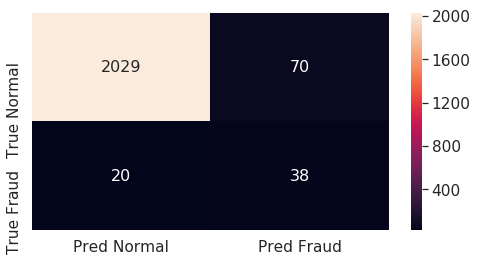

In [145]:
# Obtain the ROC score
print(roc_auc_score(y_test, km_y_pred))

# Create a confusion matrix
km_cm = confusion_matrix(y_test, km_y_pred)

# Plot the confusion matrix in a figure to visualize results 
plot_confusion_matrix(km_cm)

# 3.2. Other clustering fraud detection methods

In [146]:
from sklearn.cluster import DBSCAN

In [147]:
db = DBSCAN(eps=0.5, min_samples=10, n_jobs=-1).fit(X_scaled)
db

DBSCAN(algorithm='auto', eps=0.5, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=10, n_jobs=-1, p=None)

In [148]:
'''Get the cluster labels'''
pred_labels = db.labels_
pred_labels

array([ 0,  1,  0, ..., 21,  9,  1])

In [149]:
npValueCounts(pred_labels)

,value,count
0,-1,59
1,0,3252
2,1,145
3,2,2714
4,3,55
5,4,174
6,5,119
7,6,122
8,7,98
9,8,54


In [150]:
'''Count the total number of clusters'''
n_clusters_ = len(set(pred_labels)) - (1 if -1 in pred_labels else 0)
n_clusters_

22

In [151]:
print('Estimated number of clusters: %d' % n_clusters_)

Estimated number of clusters: 22


In [152]:
print('Silhouette coefficient: %0.3f' % metrics.silhouette_score(X_scaled, pred_labels))

Silhouette coefficient: 0.712


## DB scan

In this exercise you're going to explore using a density based clustering method (DBSCAN) to detect fraud. The advantage of DBSCAN is that you do not need to define the number of clusters beforehand. Also, DBSCAN can handle weirdly shaped data (i.e. non-convex) much better than K-means can. This time, you are not going to take the outliers of the clusters and use that for fraud, but take the smallest clusters in the data and label those as fraud. You again have the scaled dataset, i.e. X_scaled available. Let's give it a try!

In [163]:
X_scaled = df3_6
X_scaled.shape

(3100, 17)

In [169]:
labels = df3_5
labels.shape

(3100,)

In [171]:
# Import DBSCAN
from sklearn.cluster import DBSCAN
from sklearn.metrics import homogeneity_score, silhouette_score

# Initialize and fit the DBscan model
db = DBSCAN(eps=0.9, min_samples=10, n_jobs=-1).fit(X_scaled)

# Obtain the predicted labels and calculate number of clusters
pred_labels = db.labels_
n_clusters = len(set(pred_labels)) - (1 if -1 in labels else 0)

# Print performance metrics for DBscan
print('Estimated number of clusters: %d' % n_clusters)
print("Homogeneity: %0.3f" % homogeneity_score(labels, pred_labels))
print("Silhouette Coefficient: %0.3f" % silhouette_score(X_scaled, pred_labels))

Estimated number of clusters: 18
Homogeneity: 0.633
Silhouette Coefficient: 0.707


## Assessing smallest clusters

In this exercise you're going to have a look at the clusters that came out of DBscan, and flag certain clusters as fraud:

- you first need to figure out how big the clusters are, and filter out the smallest
then, 
- you're going to take the smallest ones and flag those as fraud
- last, you'll check with the original labels whether this does actually do a good job in detecting fraud.

Available are the DBscan model predictions, so n_clusters is available as well as the cluster labels, which are saved under pred_labels. Let's give it a try!

In [173]:
n_clusters, pred_labels.shape

(18, (3100,))

In [180]:
df3_1.shape, df3_2.shape, df3_4.shape, df3_5.shape, df3_6.shape, df3_7.shape

((7189, 18), (7200, 5), (7189,), (3100,), (3100, 17), (7189, 17))

In [183]:
# Count observations in each cluster number
counts = np.bincount(pred_labels[pred_labels >= 0])

# Print the result
print(counts)

# Sort the sample counts of the clusters and take the top 3 smallest clusters
smallest_clusters = np.argsort(counts)[:3]

# Print the results 
print("The smallest clusters are clusters:")      
print(smallest_clusters)

# Print the counts of the smallest clusters only
print("Their counts are:")      
print(counts[smallest_clusters])

[1173   23 1400   73   43   52   34   47   55   14   21   17   20   23
   15   11   23]
The smallest clusters are clusters:
[15  9 14]
Their counts are:
[11 14 15]


# 4. Using text data to detect fraud

In [88]:
df4_1 = pd.read_pickle('data/chapter_4/corpus.pickle')
print(type(df4_1))
print(len(df4_1))
df4_1[0]

<class 'list'>
200


[(0, 1),
 (1, 2),
 (2, 1),
 (3, 1),
 (4, 2),
 (5, 1),
 (6, 2),
 (7, 1),
 (8, 1),
 (9, 1),
 (10, 5),
 (11, 2),
 (12, 1),
 (13, 1),
 (14, 1),
 (15, 1),
 (16, 1),
 (17, 1),
 (18, 1),
 (19, 1),
 (20, 1),
 (21, 1),
 (22, 1),
 (23, 1),
 (24, 1),
 (25, 1),
 (26, 4),
 (27, 2),
 (28, 1),
 (29, 1),
 (30, 1),
 (31, 3),
 (32, 4),
 (33, 1),
 (34, 1),
 (35, 1),
 (36, 3),
 (37, 1),
 (38, 1),
 (39, 1),
 (40, 3),
 (41, 2),
 (42, 1),
 (43, 1),
 (44, 1),
 (45, 4),
 (46, 1),
 (47, 1),
 (48, 1),
 (49, 1),
 (50, 1),
 (51, 1),
 (52, 1),
 (53, 2),
 (54, 1),
 (55, 1),
 (56, 1),
 (57, 3),
 (58, 1),
 (59, 1),
 (60, 2),
 (61, 1),
 (62, 2),
 (63, 1),
 (64, 1),
 (65, 1),
 (66, 1),
 (67, 3),
 (68, 7),
 (69, 1),
 (70, 2),
 (71, 1),
 (72, 2),
 (73, 1),
 (74, 1),
 (75, 1),
 (76, 1),
 (77, 1),
 (78, 1),
 (79, 1),
 (80, 1),
 (81, 1),
 (82, 1),
 (83, 1),
 (84, 1),
 (85, 1),
 (86, 3),
 (87, 1),
 (88, 1),
 (89, 1),
 (90, 2),
 (91, 2),
 (92, 2),
 (93, 1),
 (94, 1),
 (95, 1),
 (96, 1),
 (97, 1),
 (98, 1),
 (99, 1),
 (100, 1),

In [89]:
df4_2 = pd.read_pickle('data/chapter_4/dict.pickle')
print(type(df4_2))
print(len(df4_2))
df4_2[0]

<class 'gensim.corpora.dictionary.Dictionary'>
8948


'affiliated'

In [90]:
df4_3 = pd.read_csv('data/chapter_4/enron_emails_clean.csv')
df4_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2090 entries, 0 to 2089
Data columns (total 6 columns):
Message-ID       2090 non-null object
From             2090 non-null object
To               2090 non-null object
Date             2090 non-null object
content          2090 non-null object
clean_content    2086 non-null object
dtypes: object(6)
memory usage: 98.0+ KB


In [91]:
df4_3.head(1)

,Message-ID,From,To,Date,content,clean_content
0,<8345058.1075840404046.JavaMail.evans@thyme>,('advdfeedback@investools.com'),('advdfeedback@investools.com'),2002-01-29 23:20:55,"INVESTools Advisory\nA Free Digest of Trusted Investment Advice\n\nTo unsubscribe from this free newsletter, please see below.\n\nIn This Issue:\n\n1. Fried Sells 4 Stocks, Gains +46.8% in 3 Months (KM)\n2. Rowe: January Index Confirms Bull Market for 2002 (ALOY)\n3. Small-Cap Advisor Earns +31.6% in 2001 (LBIX)\n4. Compounding Returns with Pine Trees (PCL)\n5. Undervalued, High-yield Bank Puts Customers First (ASO)\n\n\n*************** A Word from our Sponsor *******************\nTop Wall S...",investools advisory free digest trusted investment advice unsubscribe free newsletter please see issue fried sells stocks gains months km rowe january index confirms bull market aloy small cap advisor earns lbix compounding returns pine trees pcl undervalued high yield bank puts customers first aso word sponsor top wall street watcher ben zacks year year gain moving best brightest wall street big money machines earned ben zacks five year average annual gain start outperforming long term get ...


In [92]:
df4_3['content'].str.contains('money laundering').value_counts()

False    2090
Name: content, dtype: int64

In [93]:
df4_3['content'].str.contains('money').value_counts()

False    1866
True      224
Name: content, dtype: int64

In [94]:
df4_3['content'].str.contains('launder').value_counts()

False    2088
True        2
Name: content, dtype: int64

In [95]:
df4_3.loc[df4_3['content'].str.contains('launder', na=False)].count()

Message-ID       2
From             2
To               2
Date             2
content          2
clean_content    2
dtype: int64

In [96]:
list_of_words = ['police', 'launder']
df4_3['content'].str.contains('|'.join(list_of_words), na=False).value_counts()

False    2081
True        9
Name: content, dtype: int64

# 4.1. Text mining techniques for fraud detection

In [98]:
import nltk
from nltk import word_tokenize
import re

In [99]:
%%time

'''Tokenization'''
# text = df4_3.apply(lambda row: word_tokenize(row['content']), axis=1)
# text = text.str.rstrip()
# text = re.sub(r'[^a-zA-Z]', ' ', text)

df4_3['text'] = df4_3['content'].str.rstrip()
df4_3['text'] = df4_3['text'].str.replace(r'[^a-zA-Z]', ' ')
df4_3['text'] = df4_3.apply(lambda row: word_tokenize(row['text']), axis=1)
text = df4_3['text']

CPU times: user 4.73 s, sys: 33.8 ms, total: 4.77 s
Wall time: 4.77 s


In [100]:
df4_3.head(1)

,Message-ID,From,To,Date,content,clean_content,text
0,<8345058.1075840404046.JavaMail.evans@thyme>,('advdfeedback@investools.com'),('advdfeedback@investools.com'),2002-01-29 23:20:55,"INVESTools Advisory\nA Free Digest of Trusted Investment Advice\n\nTo unsubscribe from this free newsletter, please see below.\n\nIn This Issue:\n\n1. Fried Sells 4 Stocks, Gains +46.8% in 3 Months (KM)\n2. Rowe: January Index Confirms Bull Market for 2002 (ALOY)\n3. Small-Cap Advisor Earns +31.6% in 2001 (LBIX)\n4. Compounding Returns with Pine Trees (PCL)\n5. Undervalued, High-yield Bank Puts Customers First (ASO)\n\n\n*************** A Word from our Sponsor *******************\nTop Wall S...",investools advisory free digest trusted investment advice unsubscribe free newsletter please see issue fried sells stocks gains months km rowe january index confirms bull market aloy small cap advisor earns lbix compounding returns pine trees pcl undervalued high yield bank puts customers first aso word sponsor top wall street watcher ben zacks year year gain moving best brightest wall street big money machines earned ben zacks five year average annual gain start outperforming long term get ...,"[INVESTools, Advisory, A, Free, Digest, of, Trusted, Investment, Advice, To, unsubscribe, from, this, free, newsletter, please, see, below, In, This, Issue, Fried, Sells, Stocks, Gains, in, Months, KM, Rowe, January, Index, Confirms, Bull, Market, for, ALOY, Small, Cap, Advisor, Earns, in, LBIX, Compounding, Returns, with, Pine, Trees, PCL, Undervalued, High, yield, Bank, Puts, Customers, First, ASO, A, Word, from, our, Sponsor, Top, Wall, Street, Watcher, Ben, Zacks, year, Year, Gain, Movin..."


In [101]:
from nltk.corpus import stopwords
import string

In [102]:
'''Remove all stopwords and punctuation'''
exclude = set(string.punctuation)
print(exclude)

{"'", '_', ';', '{', '>', ',', '}', '`', ':', ']', '-', '!', '%', '[', '\\', '?', '/', '&', '+', '~', '(', '|', '*', '#', '@', '.', '<', '"', '$', '^', ')', '='}


In [103]:
stop = set(stopwords.words('english'))
print(stop)

{'couldn', 'from', 'the', "you'd", 'such', 'has', 'yours', 'with', 'same', 'they', 'myself', 'have', 'doesn', 'it', 'under', 'haven', "it's", 'while', 'm', 'we', 'hasn', 'when', 'am', 'both', 'most', "won't", "hasn't", 'other', 'being', 'doing', 'above', 'o', 'about', 'ourselves', "shouldn't", 'shouldn', 'having', 's', 'was', 'wouldn', 'hers', 'so', 'herself', 'very', 'she', 'he', 'a', 'can', 'shan', 'down', 'whom', 'again', 'these', 'does', "mightn't", 'before', 'himself', 'by', 'not', "don't", 'further', 'nor', 'at', 'than', 'yourself', 'over', 'where', 'which', 'wasn', 'that', 'as', 'i', 're', 'did', 'just', "weren't", 'my', 'do', 'd', 'their', 'had', 'once', 'but', 'our', 'there', 'why', 'won', "should've", 'aren', "shan't", 've', 'ain', 'to', 'what', 'ma', 'only', 'and', 'his', 'during', "you'll", 'll', "she's", 'an', 'hadn', "you're", 'isn', 'weren', 'some', 'all', 'or', 'few', 'don', "aren't", 'should', 'mightn', 'theirs', 'its', 'themselves', "wouldn't", 't', 'more', 'itself', 

In [106]:
len(text)

2090

In [108]:
stop_free = ' '.join([word for word in lis for lis in text if ((word not in stop) and (not word.isdigit()))])

# for lis in text:
#     for word in lis:
#         if (word not in stop) and (not word.isdigit()):
#             stop_free = ' '.join([word])

print(stop_free[:100])

Forwarded Forwarded Forwarded Forwarded Forwarded Forwarded Forwarded Forwarded Forwarded Forwarded 


In [109]:
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer

In [110]:
'''Lemmatize words'''
lemma = WordNetLemmatizer()

'''Stem words'''
porter = PorterStemmer()

# 4.2. Topic modelling

In [111]:
import gensim
from gensim import corpora

In [112]:
df4_3.head(1)

,Message-ID,From,To,Date,content,clean_content,text
0,<8345058.1075840404046.JavaMail.evans@thyme>,('advdfeedback@investools.com'),('advdfeedback@investools.com'),2002-01-29 23:20:55,"INVESTools Advisory\nA Free Digest of Trusted Investment Advice\n\nTo unsubscribe from this free newsletter, please see below.\n\nIn This Issue:\n\n1. Fried Sells 4 Stocks, Gains +46.8% in 3 Months (KM)\n2. Rowe: January Index Confirms Bull Market for 2002 (ALOY)\n3. Small-Cap Advisor Earns +31.6% in 2001 (LBIX)\n4. Compounding Returns with Pine Trees (PCL)\n5. Undervalued, High-yield Bank Puts Customers First (ASO)\n\n\n*************** A Word from our Sponsor *******************\nTop Wall S...",investools advisory free digest trusted investment advice unsubscribe free newsletter please see issue fried sells stocks gains months km rowe january index confirms bull market aloy small cap advisor earns lbix compounding returns pine trees pcl undervalued high yield bank puts customers first aso word sponsor top wall street watcher ben zacks year year gain moving best brightest wall street big money machines earned ben zacks five year average annual gain start outperforming long term get ...,"[INVESTools, Advisory, A, Free, Digest, of, Trusted, Investment, Advice, To, unsubscribe, from, this, free, newsletter, please, see, below, In, This, Issue, Fried, Sells, Stocks, Gains, in, Months, KM, Rowe, January, Index, Confirms, Bull, Market, for, ALOY, Small, Cap, Advisor, Earns, in, LBIX, Compounding, Returns, with, Pine, Trees, PCL, Undervalued, High, yield, Bank, Puts, Customers, First, ASO, A, Word, from, our, Sponsor, Top, Wall, Street, Watcher, Ben, Zacks, year, Year, Gain, Movin..."


In [113]:
# Create dictionary number of times a word appears
dictionary = corpora.Dictionary(df4_3['text'])
type(dictionary)

gensim.corpora.dictionary.Dictionary

In [114]:
# Filter out (non)frequent words
dictionary.filter_extremes(no_below=5, keep_n=50000)

In [115]:
from itertools import islice

def take(n, iterable):
    "Return first n items of the iterable as a list"
    return list(islice(iterable, n))

In [116]:
take(10, dictionary.dfs.items())

[(3, 10),
 (0, 402),
 (41, 31),
 (63, 21),
 (2, 6),
 (539, 66),
 (255, 888),
 (254, 154),
 (371, 35),
 (411, 488)]

In [117]:
dictionary.num_docs

2090

In [118]:
dictionary.num_nnz

324309

In [119]:
dictionary.num_pos

724142

In [120]:
%%time

# Create corpus
corpus = [dictionary.doc2bow(text) for text in df4_3['text']]

CPU times: user 370 ms, sys: 4.08 ms, total: 374 ms
Wall time: 372 ms


In [121]:
len(corpus)

2090

## Latent Dirichlet Allocation (LDA) with gensim

In [122]:
'''Define the LDA model'''
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = 3, id2word=dictionary, passes=15)

In [123]:
'''Print the 3 topics from the model with top words'''
topics = ldamodel.print_topics(num_words=4)

In [124]:
for topic in topics:
    print(topic)

(0, '0.035*"com" + 0.030*"http" + 0.023*"net" + 0.022*"IMAGE"')
(1, '0.021*"ECT" + 0.014*"Enron" + 0.014*"ENRON" + 0.013*"Subject"')
(2, '0.015*"s" + 0.015*"Enron" + 0.012*"com" + 0.009*"or"')


# 4.3. Flagging fraud based on topics

In [126]:
def get_topic_details(ldamodel, corpus):
    topic_details_df = pd.DataFrame()
    
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        
        for j, (topic_num, prop_topic) in enumerate(row):
            '''dominant topic'''
            if j == 0:
                wp = ldamodel.show_topic(topic_num)
                topic_details_df = topic_details_df.append(pd.Series([topic_num, wp]))
    
    topic_details_df.columns = ['Dominant_Topic', '% Score']
    
    return topic_details_df

In [128]:
# contents = pd.DataFrame({'Original text': text_clean})